In [1]:
using LinearAlgebra, Distributions

In [2]:
using Plots

In [2]:
#remark endで閉じる
n=10
for i=(n-1):-1:1
    println(i)
end

9
8
7
6
5
4
3
2
1


## β-Hermite ensembles

* http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.308.6290&rep=rep1&type=pdf
<img src="hermite.png" width=50%>

In [68]:
T(n,β)=SymTridiagonal(rand(Normal(0,√(2β)),n),[rand(Chi(i*β)) for i=(n-1):-1:1])

T (generic function with 1 method)

In [32]:
# example：real case(β=1)
T(10,1)

10×10 SymTridiagonal{Float64,Array{Float64,1}}:
 1.85381  2.15657    ⋅         ⋅       …   ⋅          ⋅          ⋅ 
 2.15657  0.521804  2.89165    ⋅           ⋅          ⋅          ⋅ 
  ⋅       2.89165   0.347749  2.97803      ⋅          ⋅          ⋅ 
  ⋅        ⋅        2.97803   2.16042      ⋅          ⋅          ⋅ 
  ⋅        ⋅         ⋅        2.40936      ⋅          ⋅          ⋅ 
  ⋅        ⋅         ⋅         ⋅       …   ⋅          ⋅          ⋅ 
  ⋅        ⋅         ⋅         ⋅          3.42761     ⋅          ⋅ 
  ⋅        ⋅         ⋅         ⋅          0.717899   1.27058     ⋅ 
  ⋅        ⋅         ⋅         ⋅          1.27058   -0.25619    0.429052
  ⋅        ⋅         ⋅         ⋅           ⋅         0.429052  -0.262212

In [7]:
n=10000;β=1;
@time F=eigen(T(n,β)/√(β*n))
list=F.values;

 24.125042 seconds (1.24 M allocations: 829.583 MiB, 0.77% gc time)


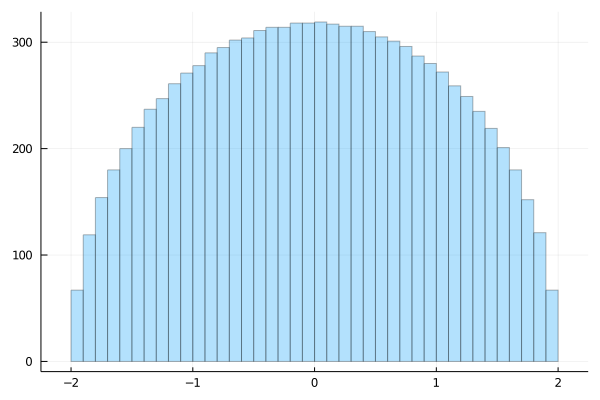

In [10]:
plot(size=(600, 320))
histogram(list,legend=false,norm=false,alpha=0.3,bin=-2:0.1:2)

In [11]:
@which eigen(T(n, β)/√(n*β))

eigen(A::SymTridiagonal{T,V} where V<:AbstractArray{T,1}) where T in LinearAlgebra at /Applications/Julia-1.5.app/Contents/Resources/julia/share/julia/stdlib/v1.5/LinearAlgebra/src/tridiag.jl:280

## β-Laguerre ensembles

<img src="laguerre.png" width=50%>

In [3]:
B(n,m,β)=Bidiagonal([rand(Chi(i*β)) for i=n:-1:(n-m+1)],[rand(Chi(i*β)) for i=m-1:-1:1],:L)

B (generic function with 1 method)

In [12]:
# n*m 
n=1000
m=300
β=1;
X=B(n,m,β);
X=Array(X)

300×300 Array{Float64,2}:
 31.109    0.0      0.0      0.0      0.0     …   0.0       0.0        0.0
 16.9915  32.5001   0.0      0.0      0.0         0.0       0.0        0.0
  0.0     16.7982  31.9989   0.0      0.0         0.0       0.0        0.0
  0.0      0.0     17.6168  31.27     0.0         0.0       0.0        0.0
  0.0      0.0      0.0     17.3707  30.3272      0.0       0.0        0.0
  0.0      0.0      0.0      0.0     17.4305  …   0.0       0.0        0.0
  0.0      0.0      0.0      0.0      0.0         0.0       0.0        0.0
  0.0      0.0      0.0      0.0      0.0         0.0       0.0        0.0
  0.0      0.0      0.0      0.0      0.0         0.0       0.0        0.0
  0.0      0.0      0.0      0.0      0.0         0.0       0.0        0.0
  0.0      0.0      0.0      0.0      0.0     …   0.0       0.0        0.0
  0.0      0.0      0.0      0.0      0.0         0.0       0.0        0.0
  0.0      0.0      0.0      0.0      0.0         0.0       0.0        0.0

In [13]:
W=Transpose(X)*X
@time list1=eigen(W).values

  0.025898 seconds (15 allocations: 2.169 MiB)


300-element Array{Float64,1}:
  215.14038927658427
  221.24531362151853
  225.44872692415757
  229.07534408288947
  239.67503088476667
  243.47280568162927
  247.81577163457888
  255.6257159159602
  259.44420284403617
  260.41284464901395
  268.6557304892866
  278.6649607323286
  281.0634086071537
    ⋮
 2083.949177448223
 2094.8420681809303
 2111.6852868712167
 2122.264759201049
 2147.279103500341
 2159.0959802497473
 2207.849871180253
 2211.020904411916
 2231.274189742134
 2269.189691122572
 2309.3623194693323
 2346.675622645213

In [16]:
# Marchenko-Pastur則(Quater circle Law)のパラメータの設定
ρ=m/n;
σ=1;
b=σ*(sqrt(ρ)+1)^2;
a=σ*(1-sqrt(ρ))^2;

<img src="mp-law.png" width=50%>

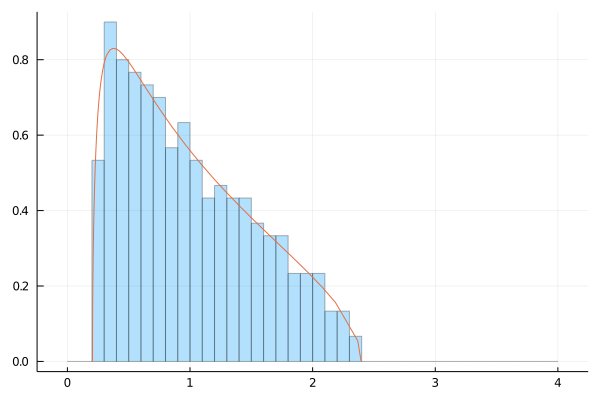

In [17]:
histogram(list1/(β*n),legend=false,norm=true,alpha=0.3,bin=0:0.1:4)
plot!(x->(1/(2pi*σ*ρ*x))*sqrt((b-x)*(x-a)),a,b)

  0.062690 seconds (13 allocations: 4.157 MiB)


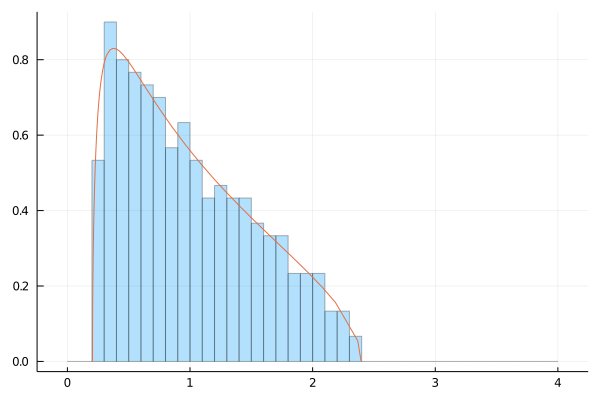

In [18]:
@time list=svd(X).S
histogram(list.^2/(β*n),legend=false,norm=true,alpha=0.3,bin=0:0.1:4)
plot!(x->(1/(2pi*σ*ρ*x))*sqrt((b-x)*(x-a)),a,b;)

## 課題1

In [116]:
list=[]
size=10^6;
β=1;
n=100;
@time for i=1:size
    append!(list,tr(T(n,β)))
end
mean(list)

  8.564603 seconds (9.00 M allocations: 2.631 GiB, 7.43% gc time)


0.015079153419959565